<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 3 Hours </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1:</b>  Fabio Ellena
<br>
<b> Student 2:</b>  Lorenzo Canale
 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of one or two students. Each group should fill and run appropriate notebook cells. 

To generate your final report, use print as PDF (Ctrl+P). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by April 7th 2017. 

# Introduction


In this session, your will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyper parameters. You will use the MNIST dataset which was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png",width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get restults. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command : 
from filename import *

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays.

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots
 








# Section 1 :  My First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the above Neural network with two inputs $X=(x1,x2)$, one hidden layers and a single output unit $(y)$.
The initial weights are set to random values. Neurons 6 and 7 represent the bias. Bias values are equal to 1.  
Training sample, X = (0.8, 0.2), whose class label is Y=0.4.

Assume that the neurons have a Sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$ and the learning rate $\mu$=1


<img src="Nimages/NN.png", width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$.

In [1]:
import utils as UT
import transfer_functions as TF
import NeuralNetwork as NN
import numpy as np

In [2]:
u3 = 0.8*0.3 + 0.2*0.8 + 1*0.2
u4 = 0.8*(-0.5) + 0.2*0.2 + 1*(-0.4)

o3 = TF.sigmoid(u3)
o4 = TF.sigmoid(u4)
o7 = 1.0
o6 = 1.0

u5 = o3*(-0.6) + o4*0.4 + o7*0.5
o5 = TF.sigmoid(u5) 
y=o5

print('feed forward:\n')
print('u3=%f' % u3)
print('u4=%f' % u4)
print('u5=%f' % u5)

print('o3=%f' % o3)
print('o4=%f' % o4)
print('o5=%f' % o5)
print('o6=%f' % o6)
print('o7=%f' % o7)

print('output of NN is %f' % o5)

feed forward:

u3=0.600000
u4=-0.760000
u5=0.240065
o3=0.645656
o4=0.318646
o5=0.559730
o6=1.000000
o7=1.000000
output of NN is 0.559730


In [3]:
dEu5 = (y-0.4)*o5*(1-o5)
w45 = 0.4
w35 = -0.6
w75 = 0.5
dEu3 = dEu5*w35*o3*(1-o3)
dEu4 = dEu5*w45*o4*(1-o4)

w45 -= dEu5*o4
w35 -= dEu5*o3
w75 -= dEu5*o7

w13 = 0.3
w14 = -0.5
w23 = 0.8
w24 = 0.2
w63 = 0.2
w64 = -0.4

w13 -= dEu3*0.8
w14 -= dEu4*0.8
w23 -= dEu3*0.2
w24 -= dEu4*0.2
w63 -= dEu3*1
w64 -= dEu4*1

print('back propagation ')
print('w13=%f' % w13)
print('w14=%f' % w14)
print('w23=%f' % w23)
print('w24=%f' % w24)
print('w63=%f' % w63)
print('w64=%f' % w64)
print('w35=%f' % w35)
print('w45=%f' % w45)
print('w75=%f' % w75)

u3 = 0.8*w13 + 0.2*w23 + 1*w63
u4 = 0.8*w14 + 0.2*w24 + 1*w64
o3 = TF.sigmoid(u3)
o4 = TF.sigmoid(u3)
o7 = 1

u5 = o3*w35 + o4*w45 + o7*w75
o5 = TF.sigmoid(u5) 
y=o5
print('output after backpropagation is %f' % y)

back propagation 
w13=0.304323
w14=-0.502735
w23=0.801081
w24=0.199316
w63=0.205403
w64=-0.403418
w35=-0.625415
w45=0.387457
w75=0.460637
output after backpropagation is 0.576032


#Your answer goes here :

$w_{1,3}= 0.304323 $ 

$w_{1,4}= -0.502735 $

$w_{2,3}= 0.801081 $

$w_{2,4}= 0.199316 $

$w_{6,3}= 0.205403 $

$w_{6,4}= -0.403418 $

$w_{3,5}= -0.625415 $

$w_{4,5}= 0.387457 $

$w_{7,5}= 0.460637 $





<b>Part 2</b>: Neural Network Implementation

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py </a> file) and reinitialise weights. 
Then you will to complete the Feed Forward and the Back-propagation functions. 

<b>Question 1.2.1</b>: Define the neural network corresponding to the one in part 1

In [6]:
from NeuralNetwork import *
#create the network
my_first_net = NeuralNetwork(input_layer_size=2, hidden_layer_size=2, output_layer_size=1,)

In [7]:
#Data preparation 
X=[0.8,0.2]
Y=[0.4]
data=[]
data.append(X)
data.append(Y)

#initialize weights
wi=np.array([[0.3,-0.5],[0.8,0.2],[0.2,-0.4]])
wo=np.array([[-0.6],[0.4],[0.5]])
my_first_net.weights_initialisation(wi,wo)
print(my_first_net.W_input_to_hidden)
print(my_first_net.W_hidden_to_output)

[[ 0.3 -0.5]
 [ 0.8  0.2]
 [ 0.2 -0.4]]
[[-0.6]
 [ 0.4]
 [ 0.5]]


<b>Question 1.2.2</b>: Implement the Feed Forward function (feedForward(X) in the NeuralNetwork.py file)



In [8]:
def feedForward(self, inputs):
    # Compute input activations
    self.a_input = np.append(inputs, [1])
    # Compute  hidden activations
    self.a_hidden = np.append(self.tf(self.a_input.dot(self.W_input_to_hidden)), [1])
    # Compute output activations       
    self.a_out = self.tf(self.a_hidden.dot(self.W_hidden_to_output))

    return self.a_out

Check your network outputs the expected value (the one you computed in question 1.1)

In [9]:
#test my  Feed Forward function 
Output_activation=my_first_net.feedForward(X)
print("output activation =%.3f" %(Output_activation))

output activation =0.560


<b>Question 1.2.3</b>: Implement the Back-propagation Algorithm (backPropagate(Y) in the NeuralNetwork.py file)  


In [10]:
def backPropagate(self, targets):
    # calculate error terms for output
    self.err_out = self.a_out - targets
    # calculate error terms for hidden
    delta_out = self.err_out * self.dtf(self.a_out)
    delta_hidden = self.W_hidden_to_output.dot(delta_out) * self.dtf(self.a_hidden)
    # update output weights: calculate the new weights
    self.W_hidden_to_output -= self.learning_rate * np.outer(self.a_hidden, delta_out)
    # update input weights
    self.W_input_to_hidden -= self.learning_rate * np.outer(self.a_input, delta_hidden[:-1])
    # calculate error
    return np.sum(self.err_out**2) / 2

Check the gradient values and weight updates are correct (similar to the ones you computed in question 1.1)

In [11]:
#test my  Back-propagation function
my_first_net.backPropagate(Y)
#Print weights after backpropagation
print('wi_new=', my_first_net.W_input_to_hidden)
print('wo_new=', my_first_net.W_hidden_to_output)

('wi_new=', array([[ 0.30043227, -0.50027347],
       [ 0.80010807,  0.19993163],
       [ 0.20054033, -0.40034184]]))
('wo_new=', array([[-0.60254147],
       [ 0.39874573],
       [ 0.49606375]]))


Your Feed Forward and Back-Propagation implementations are working, Great!! Let's tackle a real world problem.

# Section 2 : The MNIST Challenge! 

<b>Data Preparation</b>

The MNIST dataset consists of handwritten digit images it contains 60,000 examples for the training set and 10,000 examples for testing. In this Lab Session, the official training set of 60,000 is divided into an actual training set of 50,000 examples, 10,000 validation examples and 10,000 examples for test. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. The images are stored in byte form you will use the NumPy python library to read the data files into NumPy arrays that we will use to train the ANN.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the the load_data() function.


In [12]:
from utils import *
training_data, validation_data, test_data=load_data()

print("Training data size: %d" % (len(training_data)))
print("Validation data size: %d" % (len(validation_data)))
print("Test data size: %d" % (len(test_data)))

Loading MNIST data .....
Done.
Training data size: 50000
Validation data size: 10000
Test data size: 10000


<b>MNIST Dataset Digits Visualisation</b>

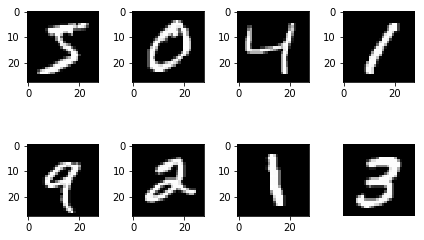

In [13]:
ROW = 2
COLUMN = 4
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = training_data[i][0].reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

<b>Part 1</b>: Creating the Neural Networks

The input layer of the neural network contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits, and so the input layer contains 784=28×28 neurons. The second layer of the network is a hidden layer, we set the neuron number in the hidden layer to 30. The output layer contains 10 neurons. 

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class

In [14]:
#create the network
from NeuralNetwork import * 
my_mnist_net = NeuralNetwork(784, 30, 10, iterations=30, learning_rate=0.1)

<b>Question 2.1.2</b>: Add the information about the performance of the neural network on the test set at each epoch

In [15]:
test_accuracy=my_mnist_net.predict(test_data)/100
print('Test_Accuracy  %-2.2f' % test_accuracy)

Test_Accuracy  8.79


<b>Question 2.1.3</b>: Train the Neural Network and comment your findings

In [16]:
#train your network 
evaluations = my_mnist_net.train(training_data,validation_data)


Iteration:  1/30[==============] -Error: 0.1655674548  -Training_Accuracy:  88.06  -time: 15.64 
Iteration:  2/30[==============] -Error: 0.0900181135  -Training_Accuracy:  90.54  -time: 33.58 
Iteration:  3/30[==============] -Error: 0.0745799926  -Training_Accuracy:  91.95  -time: 47.70 
Iteration:  4/30[==============] -Error: 0.0662253743  -Training_Accuracy:  92.61  -time: 61.77 
Iteration:  5/30[==============] -Error: 0.0609684985  -Training_Accuracy:  93.30  -time: 75.87 
Iteration:  6/30[==============] -Error: 0.0567575099  -Training_Accuracy:  93.59  -time: 103.45 
Iteration:  7/30[==============] -Error: 0.0538454924  -Training_Accuracy:  94.10  -time: 117.36 
Iteration:  8/30[==============] -Error: 0.0511648403  -Training_Accuracy:  94.11  -time: 134.97 
Iteration:  9/30[==============] -Error: 0.0490640124  -Training_Accuracy:  94.53  -time: 153.27 
Iteration: 10/30[==============] -Error: 0.0470885581  -Training_Accuracy:  94.78  -time: 170.12 
Iteration: 11/30[========

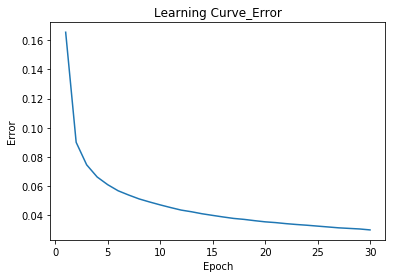

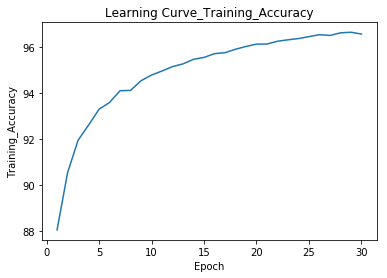

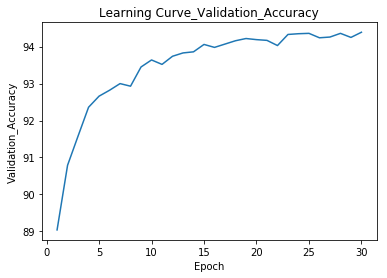

In [17]:
UT.plot_curve(range(1,my_mnist_net.iterations+1),evaluations[0], "Error")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[1], "Training_Accuracy")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[2], "Validation_Accuracy")

In [79]:
#save your model in Models/ using a distinguishing name for your model (architecture, learning rate, etc...)
my_mnist_net.save("Models/model_" + str(784) + "_" + str(30) + "_" + str(10) + "_" + str(0.1) + "_" + "30.model")

<div class="panel panel-primary">
  <div class="panel-heading">Observations</div>
  <div class="panel-body">
After each iteration, the error decreases at exponential rate. This looks reasonable.
<br>
<br>
Looking at the training accuracy, it increases after each iteration but at a lower rate. We think that this is because, like the error, in the first iterations is easy to improve because initial weights are random.
<br>
<br>
Looking at validation accuracy, the pattern is similar to that of the training accuracy, but the improvement is not monotoni: sometimes after an iteration we have a worse accuracy, this is because we try to improve our net on training data and here we are looking at validation data.
At the end, we obtain an accuracy of 95%, which is few units below the training accuracy.
<br>
<br>
We can state that the net is not overfitting.</div>
</div>

<b>Question 2.1.4</b>: Guess digit, Implement and test a python function that predict the class of a digit (the folder images_test contains some examples of images of digits)


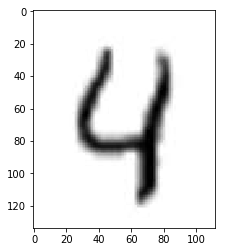

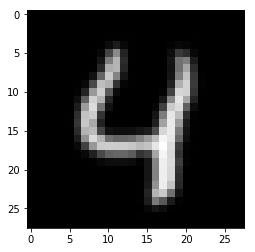

predicted: 4, real number: 4


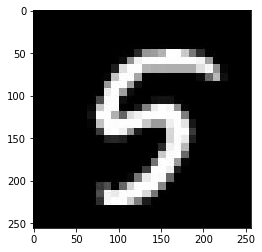

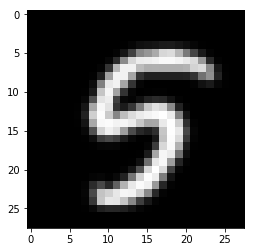

predicted: 5, real number: 5


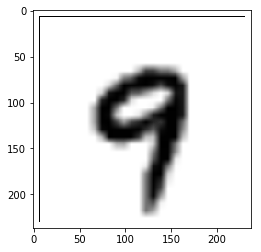

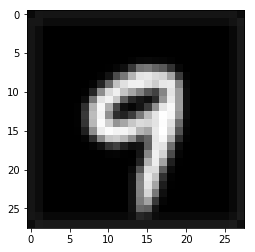

predicted: 9, real number: 9


In [33]:
#Your implementation goes here
reload(NN)
from scipy import misc

def predict_image(my_mnist_net,img_path,number):    
    img = misc.imread(img_path,mode='L')
    plt.imshow(img, cmap='gray')
    plt.show()

    mean = np.mean(img)
    if mean > 255/2 :
        img = np.invert(img)
    
    img = misc.imresize(img, (28,28))        
    plt.imshow(img, cmap='gray')
    plt.show()
    
    #count pixels
    
    img = np.reshape(img, (28*28))
    test = (img,number)
    #print(img)
    return my_mnist_net.predict2(test)

print('predicted: %d, real number: %d' %predict_image(my_mnist_net,'./Images_test/4.bmp',4))
print('predicted: %d, real number: %d' %predict_image(my_mnist_net,'./Images_test/5.bmp',5))
print('predicted: %d, real number: %d' %predict_image(my_mnist_net,'./Images_test/9.bmp',9))

<div class="panel panel-primary">
  <div class="panel-heading">Observations</div>
  <div class="panel-body">
In a first moment, only one of the three test images are correctly recognized.
The problem was that some number were black over a white background.

Then we managed to convert all the images to the same format: background black and number in white and we obtained 3 matches over 3. In order to convert the images we checked the mean color of the figure and then if it was white, we inverted all the colors.
<br>
<br>
We think this is due to the fact that here we are using a NN that was trained with numbers in white. Then, when a number is black it doesn't work.
</div>
</div>

<b>Part 2</b>: Change the neural network structure and parameters to optimize performance

<b> Question 2.2.1</b>: Change the learning rate (0.001, 0.1, 1.0 , 10). Train the new neural nets with the original specifications (Part 2.1), for 50 iterations. 
Plot test accuracy vs iteration for each learning rate on the same graph. Report the maximum
test accuracy achieved for each learning rate. Which one achieves the maximum test accuracy?

In [16]:
#Your implementation with a learning rate of 0.001 goes here 
my_mnist_net = NeuralNetwork(28*28, 30, 10, learning_rate=0.001, iterations=50)
evaluations = my_mnist_net.train(training_data, validation_data)

Iteration:  1/50[==============] -Error: 0.4859765042  -Training_Accuracy:  38.64  -time: 13.50 
Iteration:  2/50[==============] -Error: 0.3953032951  -Training_Accuracy:  48.22  -time: 29.14 
Iteration:  3/50[==============] -Error: 0.3636985282  -Training_Accuracy:  54.60  -time: 44.42 
Iteration:  4/50[==============] -Error: 0.3384765839  -Training_Accuracy:  59.06  -time: 62.47 
Iteration:  5/50[==============] -Error: 0.3178134567  -Training_Accuracy:  61.82  -time: 75.17 
Iteration:  6/50[==============] -Error: 0.3006752240  -Training_Accuracy:  64.03  -time: 88.44 
Iteration:  7/50[==============] -Error: 0.2864235242  -Training_Accuracy:  65.95  -time: 103.78 
Iteration:  8/50[==============] -Error: 0.2744133441  -Training_Accuracy:  67.47  -time: 116.48 
Iteration:  9/50[==============] -Error: 0.2641674555  -Training_Accuracy:  68.79  -time: 129.15 
Iteration: 10/50[==============] -Error: 0.2552398978  -Training_Accuracy:  69.84  -time: 141.80 
Iteration: 11/50[=========

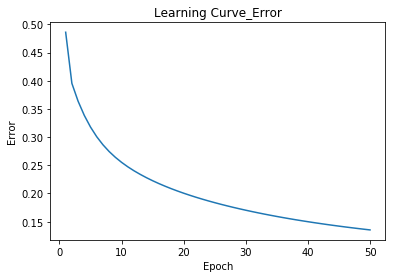

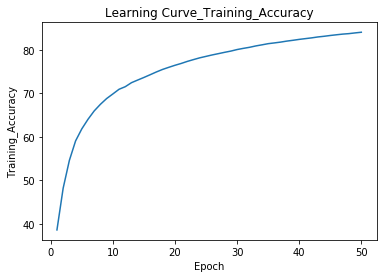

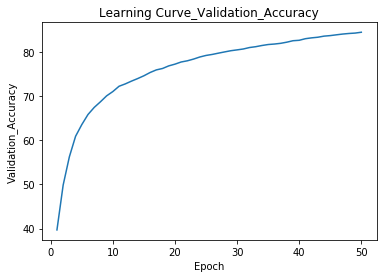

In [17]:
UT.plot_curve(range(1,my_mnist_net.iterations+1),evaluations[0], "Error")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[1], "Training_Accuracy")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[2], "Validation_Accuracy")

<div class="panel panel-primary">
  <div class="panel-heading">Observations</div>
  <div class="panel-body">
With a very low learning rate, the error decreases at a lower rate.
<br>
This means that it may take more time to reach a good result.
<br>
<br>
Looking at the training accuracy, it increases after each iteration but at a lower rate. We note that the resulting curve is very clean, this means that every time we move very little in the position of the gradient. This is because the learning rate is really low.
<br>
We see the same pattern with the validation accuracy, the curve is really clean even considering validation samples.
<br>
We can state that after 50 iterations the net can still improve, in fact we obtain a validation accuracy of 84%.</div>
</div>

In [25]:
#Your implementation with a learning rate of 0.01 goes here 
my_mnist_net = NeuralNetwork(28*28, 30, 10, learning_rate=0.01, iterations=50)
evaluations = my_mnist_net.train(training_data, validation_data)

Iteration:  1/50[==============] -Error: 0.3312215275  -Training_Accuracy:  69.04  -time: 17.18 
Iteration:  2/50[==============] -Error: 0.2223044897  -Training_Accuracy:  76.63  -time: 36.14 
Iteration:  3/50[==============] -Error: 0.1805254103  -Training_Accuracy:  80.04  -time: 53.76 
Iteration:  4/50[==============] -Error: 0.1561428295  -Training_Accuracy:  82.53  -time: 66.49 
Iteration:  5/50[==============] -Error: 0.1397394571  -Training_Accuracy:  84.16  -time: 78.76 
Iteration:  6/50[==============] -Error: 0.1277714313  -Training_Accuracy:  85.40  -time: 91.63 
Iteration:  7/50[==============] -Error: 0.1186125108  -Training_Accuracy:  86.35  -time: 104.13 
Iteration:  8/50[==============] -Error: 0.1114878433  -Training_Accuracy:  87.01  -time: 116.87 
Iteration:  9/50[==============] -Error: 0.1058014769  -Training_Accuracy:  87.72  -time: 130.19 
Iteration: 10/50[==============] -Error: 0.1011376766  -Training_Accuracy:  88.15  -time: 143.63 
Iteration: 11/50[=========

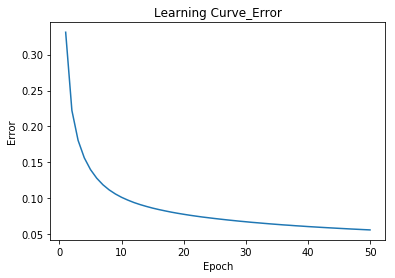

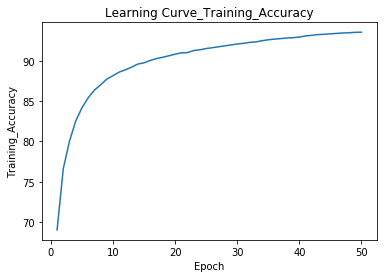

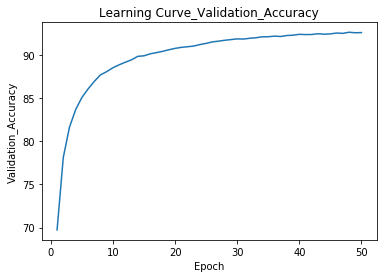

In [26]:
UT.plot_curve(range(1,my_mnist_net.iterations+1),evaluations[0], "Error")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[1], "Training_Accuracy")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[2], "Validation_Accuracy")

<div class="panel panel-primary">
  <div class="panel-heading">Observations</div>
  <div class="panel-body">
Same as before, here the learning rate is a little bit grater and we see that the slope in all the curves is steeper.
<br>
<br>
We can state that after 50 iterations the net can still improve, in fact we obtain a validation accuracy of 94%, but the slope of the curve suggests that there is space to improve.
</div>
</div>

In [18]:
#Your implementation with a learning rate of 0.1 goes here 
my_mnist_net = NeuralNetwork(28*28, 30, 10, learning_rate=0.1, iterations=50)
evaluations = my_mnist_net.train(training_data, validation_data)

Iteration:  1/50[==============] -Error: 0.1664727551  -Training_Accuracy:  87.28  -time: 13.06 
Iteration:  2/50[==============] -Error: 0.0923832385  -Training_Accuracy:  90.37  -time: 26.06 
Iteration:  3/50[==============] -Error: 0.0758983674  -Training_Accuracy:  91.64  -time: 39.40 
Iteration:  4/50[==============] -Error: 0.0677050211  -Training_Accuracy:  92.69  -time: 52.00 
Iteration:  5/50[==============] -Error: 0.0621352380  -Training_Accuracy:  93.15  -time: 64.55 
Iteration:  6/50[==============] -Error: 0.0583716609  -Training_Accuracy:  93.59  -time: 77.16 
Iteration:  7/50[==============] -Error: 0.0555261435  -Training_Accuracy:  93.81  -time: 90.77 
Iteration:  8/50[==============] -Error: 0.0530157825  -Training_Accuracy:  94.19  -time: 109.55 
Iteration:  9/50[==============] -Error: 0.0508728181  -Training_Accuracy:  94.31  -time: 123.46 
Iteration: 10/50[==============] -Error: 0.0489569816  -Training_Accuracy:  94.40  -time: 136.47 
Iteration: 11/50[==========

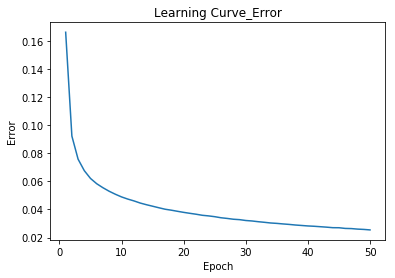

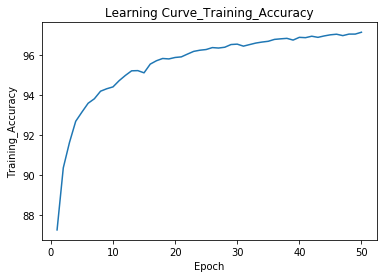

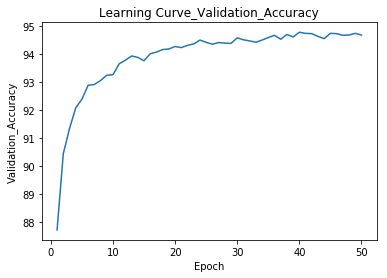

In [19]:
UT.plot_curve(range(1,my_mnist_net.iterations+1),evaluations[0], "Error")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[1], "Training_Accuracy")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[2], "Validation_Accuracy")

<div class="panel panel-primary">
  <div class="panel-heading">Observations</div>
  <div class="panel-body">
With a learning rate of 0.1 we obtain the best results.
<br>
We can state that this is probably the highest learning rate we can use, in fact we note that the validation accuracy reach a plateau where it starts to oscillate around 94.5%.
We think that this is due to the fact that the learning rate is too high, and there is a ping pong effect.
</div>
</div>


In [20]:
#Your implementation with a learning rate of 1.0 goes here 
my_mnist_net = NeuralNetwork(28*28, 30, 10, learning_rate=1.0, iterations=50)
evaluations = my_mnist_net.train(training_data, validation_data)

Iteration:  1/50[==============] -Error: 0.1083921067  -Training_Accuracy:  90.82  -time: 16.83 
Iteration:  2/50[==============] -Error: 0.0724475698  -Training_Accuracy:  92.24  -time: 34.20 
Iteration:  3/50[==============] -Error: 0.0660974927  -Training_Accuracy:  93.33  -time: 48.57 
Iteration:  4/50[==============] -Error: 0.0610788945  -Training_Accuracy:  92.75  -time: 62.45 
Iteration:  5/50[==============] -Error: 0.0582589844  -Training_Accuracy:  93.78  -time: 74.99 
Iteration:  6/50[==============] -Error: 0.0556305137  -Training_Accuracy:  93.47  -time: 87.38 
Iteration:  7/50[==============] -Error: 0.0540748004  -Training_Accuracy:  93.94  -time: 103.06 
Iteration:  8/50[==============] -Error: 0.0527171779  -Training_Accuracy:  94.41  -time: 118.57 
Iteration:  9/50[==============] -Error: 0.0494298246  -Training_Accuracy:  94.67  -time: 136.18 
Iteration: 10/50[==============] -Error: 0.0479511801  -Training_Accuracy:  95.02  -time: 152.80 
Iteration: 11/50[=========

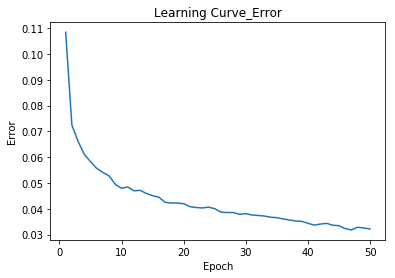

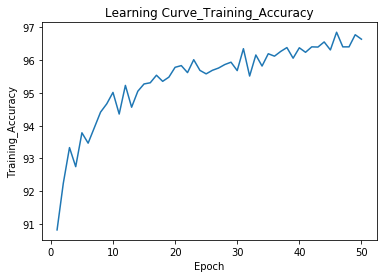

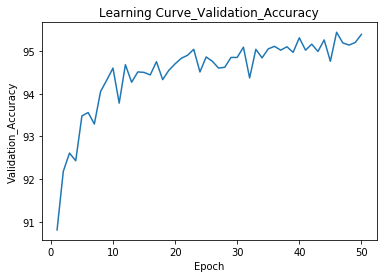

In [21]:
UT.plot_curve(range(1,my_mnist_net.iterations+1),evaluations[0], "Error")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[1], "Training_Accuracy")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[2], "Validation_Accuracy")

<div class="panel panel-primary">
  <div class="panel-heading">Observations</div>
  <div class="panel-body">
With a learning rate of 1.0, we see big fluctuations regarding both the training accuracy and the validation accuracy.
The surprising thing is that at the end we obtain a better result: 96.5% for the training accuracy and 95.5% for the validation accuracy.
<br>
Maybe fluctuations are good and help the model to achieve a better result.</div>
</div>
</div>

In [22]:
#Your implementation with a learning rate of 10.0 goes here 
my_mnist_net = NeuralNetwork(28*28, 30, 10, learning_rate=10.0, iterations=50)
evaluations = my_mnist_net.train(training_data, validation_data)

Iteration:  1/50[==============] -Error: 0.5184316462  -Training_Accuracy:  9.09  -time: 13.38 
Iteration:  2/50[==============] -Error: 0.5008010753  -Training_Accuracy:  17.87  -time: 26.85 
Iteration:  3/50[==============] -Error: 0.5002451455  -Training_Accuracy:  20.04  -time: 40.47 
Iteration:  4/50[==============] -Error: 0.5000468756  -Training_Accuracy:  10.92  -time: 54.13 
Iteration:  5/50[==============] -Error: 0.5001264602  -Training_Accuracy:  17.32  -time: 67.97 
Iteration:  6/50[==============] -Error: 0.5000491691  -Training_Accuracy:  15.41  -time: 83.02 
Iteration:  7/50[==============] -Error: 0.4999996631  -Training_Accuracy:  12.07  -time: 95.69 
Iteration:  8/50[==============] -Error: 0.5001920765  -Training_Accuracy:  12.64  -time: 108.36 
Iteration:  9/50[==============] -Error: 0.5000303581  -Training_Accuracy:  10.65  -time: 120.85 
Iteration: 10/50[==============] -Error: 0.4997744474  -Training_Accuracy:  13.34  -time: 133.84 
Iteration: 11/50[===========

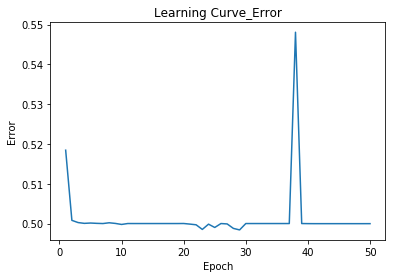

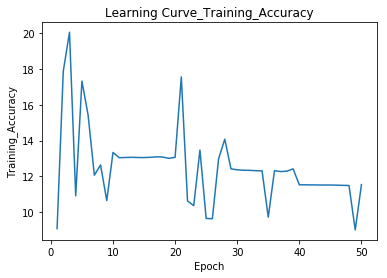

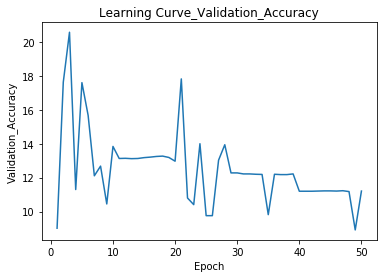

In [23]:
UT.plot_curve(range(1,my_mnist_net.iterations+1),evaluations[0], "Error")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[1], "Training_Accuracy")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[2], "Validation_Accuracy")

<div class="panel panel-primary">
  <div class="panel-heading">Observations</div>
  <div class="panel-body">
With a learning rate of 10.0, the training of our net is completely unstable and we obtain very bad results.
</div>
</div>

<div class="panel panel-primary">
  <div class="panel-heading">Final Observations</div>
  <div class="panel-body">
We saw that the learning rate is one of the most important parameters because it directly influences the training of our net. It looks that a learning rate from 0.1 to 1.0 is the best choice.
</div>
</div>

 <b> Question 2.2.2 : </b> initialize all weights to 0.  Plot the training accuracy curve.
Comment your results
    
        

In [27]:
#Your implementation goes here
my_mnist_net = NeuralNetwork(28*28, 30, 10, learning_rate=0.1, iterations=50)
my_mnist_net.weights_initialisation(np.zeros((28*28 + 1, 30)), np.zeros((31,10)))
evaluations = my_mnist_net.train(training_data, validation_data)

Iteration:  1/50[==============] -Error: 0.4089646296  -Training_Accuracy:  28.48  -time: 20.27 
Iteration:  2/50[==============] -Error: 0.3715617453  -Training_Accuracy:  31.35  -time: 41.34 
Iteration:  3/50[==============] -Error: 0.3700178290  -Training_Accuracy:  32.74  -time: 57.77 
Iteration:  4/50[==============] -Error: 0.3694228377  -Training_Accuracy:  31.21  -time: 72.02 
Iteration:  5/50[==============] -Error: 0.3689573108  -Training_Accuracy:  31.71  -time: 87.33 
Iteration:  6/50[==============] -Error: 0.3687056744  -Training_Accuracy:  31.88  -time: 100.84 
Iteration:  7/50[==============] -Error: 0.3685375747  -Training_Accuracy:  35.59  -time: 115.71 
Iteration:  8/50[==============] -Error: 0.3683981473  -Training_Accuracy:  32.91  -time: 129.88 
Iteration:  9/50[==============] -Error: 0.3681146199  -Training_Accuracy:  31.48  -time: 143.64 
Iteration: 10/50[==============] -Error: 0.3680963706  -Training_Accuracy:  32.05  -time: 157.42 
Iteration: 11/50[========

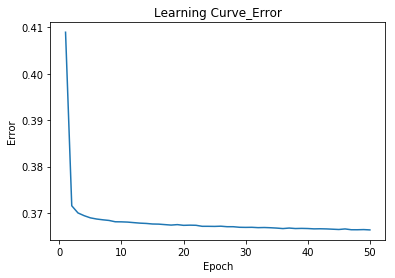

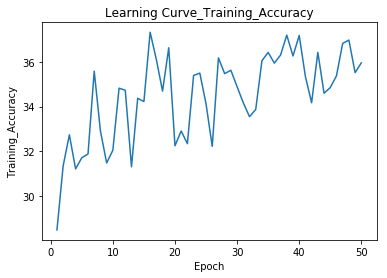

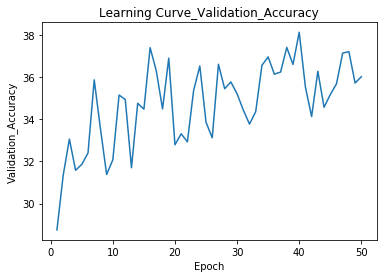

In [28]:
UT.plot_curve(range(1,my_mnist_net.iterations+1),evaluations[0], "Error")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[1], "Training_Accuracy")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[2], "Validation_Accuracy")

#Your answer goes here

## observations

When all weights are 0, we have all neurons with the same activation, in this case 0, and the same output, in this case 0.5. What happens is that all deltas will be equal, thus all the weight updates of a single layer will be equal. This means that all the neurons are learning in the same way. 

This explains why the error increases in the first iterations and then it converges.
This explains well because we need to randomize the weights to avoid this weird simmetry situations.

<b> Question 2.2.3 : </b> Try with a different transfer function (such as tanh).
 File transfer_functions.py provides you the python implementation of the tanh function and its derivative

In [30]:
#Your implementation goes here
my_mnist_net = NeuralNetwork(28*28, 30, 10, learning_rate=0.1, iterations=50,transfer_function=TF.tanh,d_transfer_function=TF.dtanh)
evaluations = my_mnist_net.train(training_data, validation_data)

Iteration:  1/50[==============] -Error: 1.1954961310  -Training_Accuracy:  66.96  -time: 15.58 
Iteration:  2/50[==============] -Error: 1.0037567352  -Training_Accuracy:  77.14  -time: 28.06 
Iteration:  3/50[==============] -Error: 0.9558486091  -Training_Accuracy:  80.58  -time: 41.97 
Iteration:  4/50[==============] -Error: 0.9341380121  -Training_Accuracy:  71.66  -time: 55.46 
Iteration:  5/50[==============] -Error: 0.9154109693  -Training_Accuracy:  82.31  -time: 67.85 
Iteration:  6/50[==============] -Error: 0.9081055626  -Training_Accuracy:  82.33  -time: 80.33 
Iteration:  7/50[==============] -Error: 0.8908336148  -Training_Accuracy:  87.99  -time: 92.78 
Iteration:  8/50[==============] -Error: 0.8849879806  -Training_Accuracy:  87.20  -time: 105.08 
Iteration:  9/50[==============] -Error: 0.8771960499  -Training_Accuracy:  87.41  -time: 117.93 
Iteration: 10/50[==============] -Error: 0.8668901406  -Training_Accuracy:  85.92  -time: 131.63 
Iteration: 11/50[==========

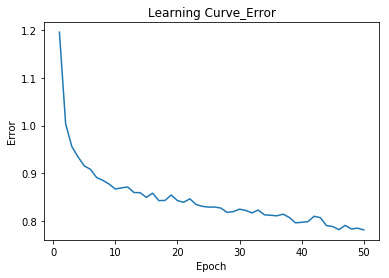

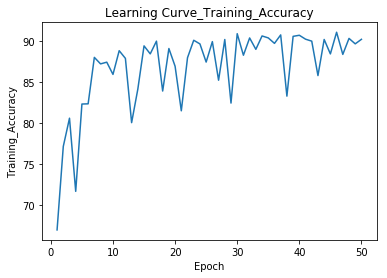

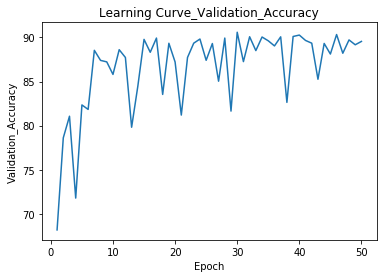

In [31]:
UT.plot_curve(range(1,my_mnist_net.iterations+1),evaluations[0], "Error")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[1], "Training_Accuracy")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[2], "Validation_Accuracy")

#Your answer goes here

<div class="panel panel-primary">
  <div class="panel-heading">Observations</div>
  <div class="panel-body">
The tanh transfer function perform worse than sigmoid function. 97% for the sigmoid vs 90 for the tanh. It seems that using the tanh we obtain many oscillations, maybe we should change the learning rate.
</div>
</div>

In [52]:
#Your implementation goes here
my_mnist_net = NeuralNetwork(28*28, 30, 10, learning_rate=0.01, iterations=50,transfer_function=TF.tanh,d_transfer_function=TF.dtanh)
evaluations = my_mnist_net.train(training_data, validation_data)

Iteration:  1/50[==============] -Error: 0.3688623088  -Training_Accuracy:  58.68  -time: 14.24 
Iteration:  2/50[==============] -Error: 0.3138715414  -Training_Accuracy:  62.85  -time: 25.36 
Iteration:  3/50[==============] -Error: 0.2791992110  -Training_Accuracy:  72.26  -time: 37.31 
Iteration:  4/50[==============] -Error: 0.2514132469  -Training_Accuracy:  71.97  -time: 48.14 
Iteration:  5/50[==============] -Error: 0.2281110686  -Training_Accuracy:  75.71  -time: 59.64 
Iteration:  6/50[==============] -Error: 0.2067592982  -Training_Accuracy:  78.47  -time: 72.88 
Iteration:  7/50[==============] -Error: 0.1915024334  -Training_Accuracy:  80.72  -time: 84.51 
Iteration:  8/50[==============] -Error: 0.1805226967  -Training_Accuracy:  81.45  -time: 95.43 
Iteration:  9/50[==============] -Error: 0.1724811449  -Training_Accuracy:  82.84  -time: 107.42 
Iteration: 10/50[==============] -Error: 0.1652117053  -Training_Accuracy:  83.38  -time: 119.46 
Iteration: 11/50[===========

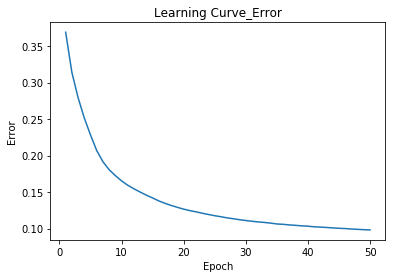

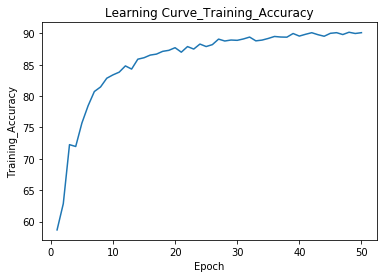

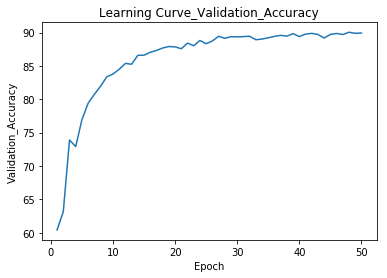

In [53]:
UT.plot_curve(range(1,my_mnist_net.iterations+1),evaluations[0], "Error")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[1], "Training_Accuracy")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[2], "Validation_Accuracy")

<div class="panel panel-primary">
  <div class="panel-heading">Observations</div>
  <div class="panel-body">
Also after the correction of the learning rate, the accuracy is quite bad.
<br>
This means that the transfer function should be carefully chosen based on the problem.</div>
</div>


<b> Question 2.2.4 : </b>  Add more neurons in the hidden layer (try with 100, 200, 300). Plot the curve representing the validation accuracy versus the number of neurons in the hidden layer.  (Choose and justify other hyper-parameters)

In [32]:
#Your implementation goes here
my_mnist_net = NeuralNetwork(28*28, 100, 10, learning_rate=0.1, iterations=50)
evaluations = my_mnist_net.train(training_data, validation_data)

Iteration:  1/50[==============] -Error: 0.1268500114  -Training_Accuracy:  89.84  -time: 30.49 
Iteration:  2/50[==============] -Error: 0.0794810963  -Training_Accuracy:  92.37  -time: 67.60 
Iteration:  3/50[==============] -Error: 0.0652931397  -Training_Accuracy:  93.64  -time: 95.17 
Iteration:  4/50[==============] -Error: 0.0565248980  -Training_Accuracy:  94.40  -time: 126.00 
Iteration:  5/50[==============] -Error: 0.0504918769  -Training_Accuracy:  94.98  -time: 152.72 
Iteration:  6/50[==============] -Error: 0.0457521597  -Training_Accuracy:  95.30  -time: 184.14 
Iteration:  7/50[==============] -Error: 0.0421894590  -Training_Accuracy:  95.70  -time: 208.53 
Iteration:  8/50[==============] -Error: 0.0391551011  -Training_Accuracy:  96.04  -time: 232.52 
Iteration:  9/50[==============] -Error: 0.0364598872  -Training_Accuracy:  96.27  -time: 266.76 
Iteration: 10/50[==============] -Error: 0.0342296890  -Training_Accuracy:  96.58  -time: 292.31 
Iteration: 11/50[======

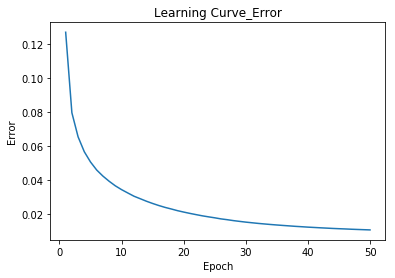

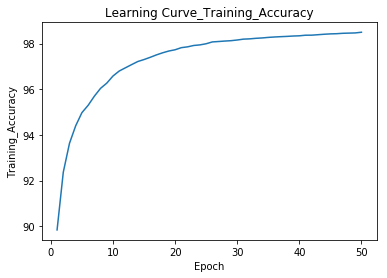

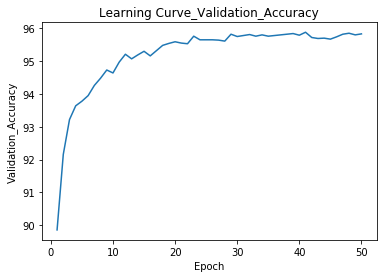

In [33]:
UT.plot_curve(range(1,my_mnist_net.iterations+1),evaluations[0], "Error")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[1], "Training_Accuracy")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[2], "Validation_Accuracy")

In [34]:
#Your implementation goes here
my_mnist_net = NeuralNetwork(28*28, 200, 10, learning_rate=0.1, iterations=50)
evaluations = my_mnist_net.train(training_data, validation_data)

Iteration:  1/50[==============] -Error: 0.1147831921  -Training_Accuracy:  91.00  -time: 47.79 
Iteration:  2/50[==============] -Error: 0.0750538955  -Training_Accuracy:  93.17  -time: 95.25 
Iteration:  3/50[==============] -Error: 0.0609653363  -Training_Accuracy:  94.14  -time: 142.30 
Iteration:  4/50[==============] -Error: 0.0521653289  -Training_Accuracy:  94.67  -time: 189.40 
Iteration:  5/50[==============] -Error: 0.0460117198  -Training_Accuracy:  95.53  -time: 236.63 
Iteration:  6/50[==============] -Error: 0.0412511240  -Training_Accuracy:  95.87  -time: 283.95 
Iteration:  7/50[==============] -Error: 0.0374865033  -Training_Accuracy:  96.32  -time: 331.19 
Iteration:  8/50[==============] -Error: 0.0343969228  -Training_Accuracy:  96.55  -time: 378.86 
Iteration:  9/50[==============] -Error: 0.0316770894  -Training_Accuracy:  96.84  -time: 426.05 
Iteration: 10/50[==============] -Error: 0.0295265670  -Training_Accuracy:  97.05  -time: 473.36 
Iteration: 11/50[=====

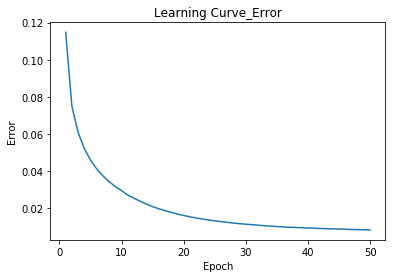

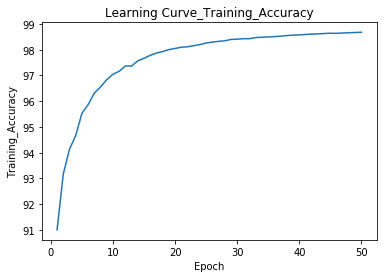

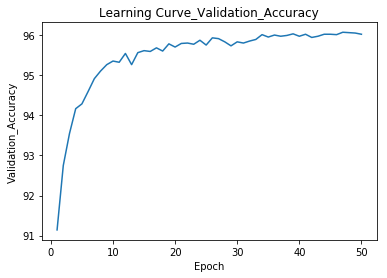

In [35]:
UT.plot_curve(range(1,my_mnist_net.iterations+1),evaluations[0], "Error")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[1], "Training_Accuracy")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[2], "Validation_Accuracy")

In [36]:
#Your implementation goes here
my_mnist_net = NeuralNetwork(28*28, 300, 10, learning_rate=0.1, iterations=50)
evaluations = my_mnist_net.train(training_data, validation_data)

Iteration:  1/50[==============] -Error: 0.1078365927  -Training_Accuracy:  91.53  -time: 134.35 
Iteration:  2/50[==============] -Error: 0.0717383261  -Training_Accuracy:  93.81  -time: 244.43 
Iteration:  3/50[==============] -Error: 0.0586870443  -Training_Accuracy:  93.99  -time: 354.60 
Iteration:  4/50[==============] -Error: 0.0503120262  -Training_Accuracy:  95.34  -time: 464.77 
Iteration:  5/50[==============] -Error: 0.0440187541  -Training_Accuracy:  95.80  -time: 551.88 
Iteration:  6/50[==============] -Error: 0.0393003128  -Training_Accuracy:  95.98  -time: 638.81 
Iteration:  7/50[==============] -Error: 0.0349806051  -Training_Accuracy:  96.54  -time: 725.34 
Iteration:  8/50[==============] -Error: 0.0318702961  -Training_Accuracy:  96.91  -time: 812.03 
Iteration:  9/50[==============] -Error: 0.0290220216  -Training_Accuracy:  97.01  -time: 898.82 
Iteration: 10/50[==============] -Error: 0.0266755271  -Training_Accuracy:  97.32  -time: 985.42 
Iteration: 11/50[===

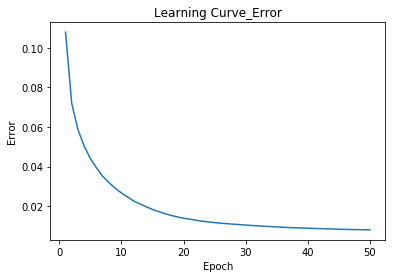

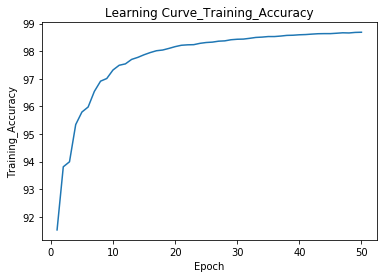

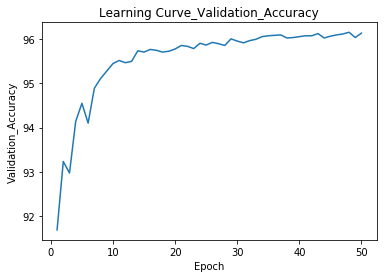

In [37]:
UT.plot_curve(range(1,my_mnist_net.iterations+1),evaluations[0], "Error")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[1], "Training_Accuracy")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[2], "Validation_Accuracy")

#Your answer goes here

In [50]:
#Your implementation goes here
my_mnist_net = NeuralNetwork(28*28, 100, 10, learning_rate=1.0, iterations=50)
evaluations = my_mnist_net.train(training_data, validation_data)

Iteration:  1/50[==============] -Error: 0.1044525482  -Training_Accuracy:  92.97  -time: 30.01 
Iteration:  2/50[==============] -Error: 0.0633675508  -Training_Accuracy:  93.33  -time: 53.12 
Iteration:  3/50[==============] -Error: 0.0537446218  -Training_Accuracy:  94.53  -time: 76.02 
Iteration:  4/50[==============] -Error: 0.0486671421  -Training_Accuracy:  95.31  -time: 100.37 
Iteration:  5/50[==============] -Error: 0.0451096115  -Training_Accuracy:  95.64  -time: 125.56 
Iteration:  6/50[==============] -Error: 0.0416869338  -Training_Accuracy:  95.89  -time: 148.60 
Iteration:  7/50[==============] -Error: 0.0409889159  -Training_Accuracy:  96.00  -time: 171.51 
Iteration:  8/50[==============] -Error: 0.0392427264  -Training_Accuracy:  96.42  -time: 194.43 
Iteration:  9/50[==============] -Error: 0.0365482051  -Training_Accuracy:  96.60  -time: 218.00 
Iteration: 10/50[==============] -Error: 0.0348344635  -Training_Accuracy:  96.33  -time: 241.34 
Iteration: 11/50[======

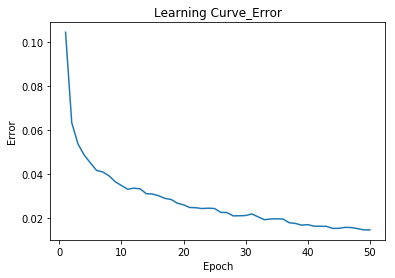

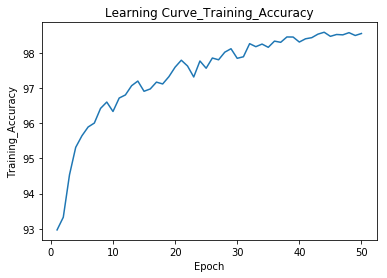

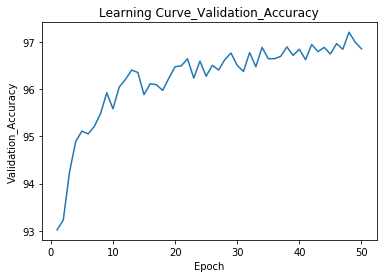

In [51]:
UT.plot_curve(range(1,my_mnist_net.iterations+1),evaluations[0], "Error")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[1], "Training_Accuracy")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[2], "Validation_Accuracy")

<div class="panel panel-primary">
  <div class="panel-heading">Observations</div>
  <div class="panel-body">
Here we see that adding neurons in our hidden layer allows us to obtain better result regarding the training accuracy. Unfortunately, validation accuracy remains stuck at 96%. This means that our net is overfitting the training data.
<br>
Here we used 50 iterations as before, and a learning rate of 0.1 because it was good.
<br>
Then we did one experiment with 100 neurons and a learning rate of 1.0 and we got better results: 98.5% of training accuracy and 97% of validation accuracy. 
Maybe this means that when we add neurons we should increase our learning rate.
<br>
<br>
Our explanation is that with more neurons it is easyer to overfit and finish in a local minimum, thus if we use a greater learning rate, we are creating a more robust net.
</div>
</div>

In [54]:
#Your implementation goes here
my_mnist_net = NeuralNetwork(28*28, 200, 10, learning_rate=1.0, iterations=50)
evaluations = my_mnist_net.train(training_data, validation_data)

Iteration:  1/50[==============] -Error: 0.1255351345  -Training_Accuracy:  91.87  -time: 56.96 
Iteration:  2/50[==============] -Error: 0.0735093105  -Training_Accuracy:  94.00  -time: 105.43 
Iteration:  3/50[==============] -Error: 0.0634531515  -Training_Accuracy:  94.46  -time: 157.52 
Iteration:  4/50[==============] -Error: 0.0571875516  -Training_Accuracy:  94.84  -time: 209.54 
Iteration:  5/50[==============] -Error: 0.0526363257  -Training_Accuracy:  94.83  -time: 263.47 
Iteration:  6/50[==============] -Error: 0.0505247631  -Training_Accuracy:  95.45  -time: 312.66 
Iteration:  7/50[==============] -Error: 0.0483123419  -Training_Accuracy:  95.54  -time: 361.94 
Iteration:  8/50[==============] -Error: 0.0482562760  -Training_Accuracy:  95.46  -time: 411.21 
Iteration:  9/50[==============] -Error: 0.0478075534  -Training_Accuracy:  96.15  -time: 469.00 
Iteration: 10/50[==============] -Error: 0.0461245338  -Training_Accuracy:  95.78  -time: 523.95 
Iteration: 11/50[====

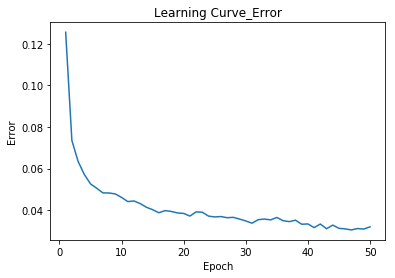

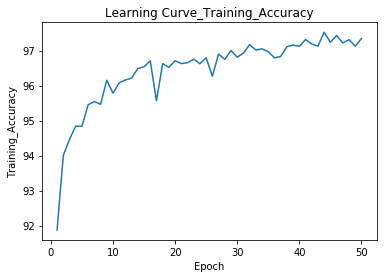

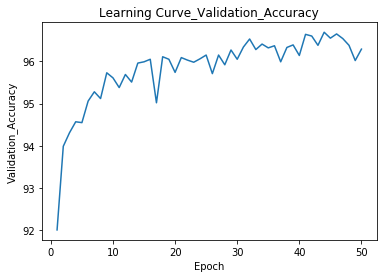

In [55]:
UT.plot_curve(range(1,my_mnist_net.iterations+1),evaluations[0], "Error")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[1], "Training_Accuracy")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[2], "Validation_Accuracy")

<div class="panel panel-primary">
  <div class="panel-heading">Observations</div>
  <div class="panel-body">
With a learning rate = 1 and 200 hidden neurons, the validation accuracy remains high, but does not improve. We noted that with the same learning rate, but 100 neurons we had a higher training accuracy. Now training accuracy and validation accuracy are almost the same, so maybe we are building a more robust model.</div>
</div>

<b> Question 2.2.5 : </b> Add one additionnal hidden layers and train your network, discuss your results with different setting. 



In [59]:
# Your implementation goes here
import NeuralNetwork2 as NN2
reload (NN2)
NeuralNetwork2 = NN2.NeuralNetwork2

my_mnist_net = NeuralNetwork2(28*28, 30, 30, 10, iterations=50, learning_rate=1.0)
evaluations = my_mnist_net.train(training_data, validation_data)

Iteration:  1/50[==============] -Error: 0.1189465449  -Training_Accuracy:  91.29  -time: 20.35 
Iteration:  2/50[==============] -Error: 0.0734038658  -Training_Accuracy:  91.53  -time: 36.01 
Iteration:  3/50[==============] -Error: 0.0629521285  -Training_Accuracy:  92.26  -time: 51.52 
Iteration:  4/50[==============] -Error: 0.0615263703  -Training_Accuracy:  93.66  -time: 67.73 
Iteration:  5/50[==============] -Error: 0.0569907713  -Training_Accuracy:  93.30  -time: 83.21 
Iteration:  6/50[==============] -Error: 0.0533270302  -Training_Accuracy:  93.36  -time: 99.06 
Iteration:  7/50[==============] -Error: 0.0524697758  -Training_Accuracy:  93.53  -time: 114.60 
Iteration:  8/50[==============] -Error: 0.0511637554  -Training_Accuracy:  94.15  -time: 130.16 
Iteration:  9/50[==============] -Error: 0.0477502216  -Training_Accuracy:  93.62  -time: 145.92 
Iteration: 10/50[==============] -Error: 0.0484027177  -Training_Accuracy:  94.62  -time: 161.51 
Iteration: 11/50[=========

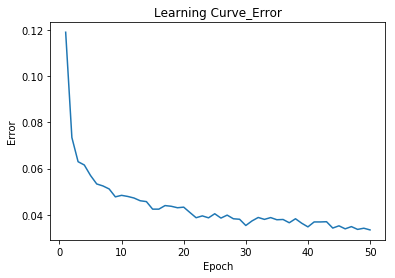

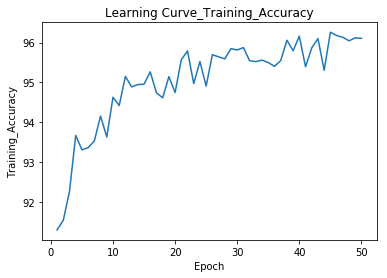

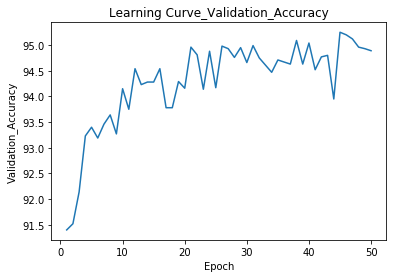

In [60]:
UT.plot_curve(range(1,my_mnist_net.iterations+1),evaluations[0], "Error")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[1], "Training_Accuracy")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[2], "Validation_Accuracy")

<div class="panel panel-primary">
  <div class="panel-heading">Observations</div>
  <div class="panel-body">
Here we see that results are poor. When we look at the fluctuations, we see that they are quite big: maybe we should decrease our learning rate.
</div>
</div>

In [61]:
# Your implementation goes here
import NeuralNetwork2 as NN2
reload (NN2)
NeuralNetwork2 = NN2.NeuralNetwork2

my_mnist_net = NeuralNetwork2(28*28, 30, 30, 10, iterations=50, learning_rate=0.1)
evaluations = my_mnist_net.train(training_data, validation_data)

Iteration:  1/50[==============] -Error: 0.2541963575  -Training_Accuracy:  84.88  -time: 17.01 
Iteration:  2/50[==============] -Error: 0.0970889344  -Training_Accuracy:  89.70  -time: 35.62 
Iteration:  3/50[==============] -Error: 0.0754924267  -Training_Accuracy:  91.69  -time: 52.74 
Iteration:  4/50[==============] -Error: 0.0649225454  -Training_Accuracy:  92.59  -time: 69.16 
Iteration:  5/50[==============] -Error: 0.0585373976  -Training_Accuracy:  93.45  -time: 84.79 
Iteration:  6/50[==============] -Error: 0.0539358436  -Training_Accuracy:  93.90  -time: 100.35 
Iteration:  7/50[==============] -Error: 0.0498412608  -Training_Accuracy:  93.94  -time: 115.81 
Iteration:  8/50[==============] -Error: 0.0471367139  -Training_Accuracy:  94.70  -time: 131.30 
Iteration:  9/50[==============] -Error: 0.0444789850  -Training_Accuracy:  95.09  -time: 146.83 
Iteration: 10/50[==============] -Error: 0.0423649478  -Training_Accuracy:  95.25  -time: 162.86 
Iteration: 11/50[========

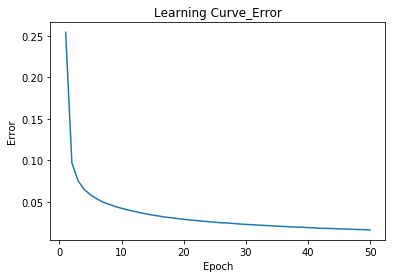

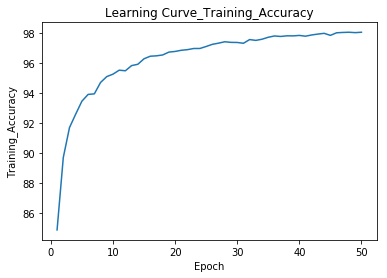

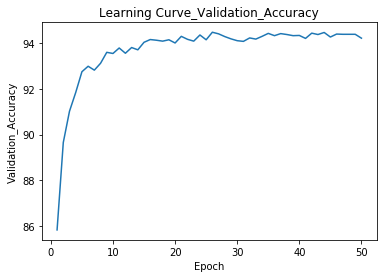

In [62]:
UT.plot_curve(range(1,my_mnist_net.iterations+1),evaluations[0], "Error")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[1], "Training_Accuracy")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[2], "Validation_Accuracy")

<div class="panel panel-primary">
  <div class="panel-heading">Observations</div>
  <div class="panel-body">
Here we see that with a lower learning rate, we obtain a better training accuracy and a lower validation accuracy. Maybe we should add more neurons.
</div>
</div>

In [63]:
# Your implementation goes here
import NeuralNetwork2 as NN2
reload (NN2)
NeuralNetwork2 = NN2.NeuralNetwork2

my_mnist_net = NeuralNetwork2(28*28, 100, 100, 10, iterations=50, learning_rate=0.1)
evaluations = my_mnist_net.train(training_data, validation_data)

Iteration:  1/50[==============] -Error: 0.2147527590  -Training_Accuracy:  89.41  -time: 34.32 
Iteration:  2/50[==============] -Error: 0.0761971170  -Training_Accuracy:  91.87  -time: 65.07 
Iteration:  3/50[==============] -Error: 0.0578224964  -Training_Accuracy:  94.09  -time: 1363.75 
Iteration:  4/50[==============] -Error: 0.0481329333  -Training_Accuracy:  95.04  -time: 1402.47 
Iteration:  5/50[==============] -Error: 0.0415289357  -Training_Accuracy:  95.62  -time: 1442.42 
Iteration:  6/50[==============] -Error: 0.0367287112  -Training_Accuracy:  96.12  -time: 1479.86 
Iteration:  7/50[==============] -Error: 0.0326946112  -Training_Accuracy:  96.60  -time: 1514.81 
Iteration:  8/50[==============] -Error: 0.0295592929  -Training_Accuracy:  96.89  -time: 1544.75 
Iteration:  9/50[==============] -Error: 0.0271667355  -Training_Accuracy:  97.15  -time: 1575.08 
Iteration: 10/50[==============] -Error: 0.0249136733  -Training_Accuracy:  97.20  -time: 1604.94 
Iteration: 11/

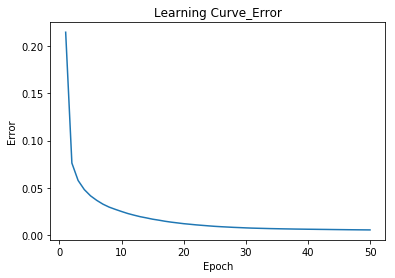

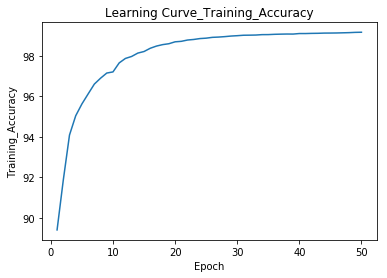

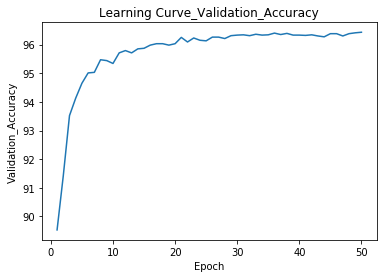

In [64]:
UT.plot_curve(range(1,my_mnist_net.iterations+1),evaluations[0], "Error")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[1], "Training_Accuracy")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[2], "Validation_Accuracy")

<div class="panel panel-primary">
  <div class="panel-heading">Observations</div>
  <div class="panel-body">
Here we see that with 100 neurons per layer we achieve a better result: training accuracy is 98.8% and validation accuracy 96.5%. We still cannot do better of the net with a single hidden layer.
<br>
If we add that the training time is higher, there is no reason to use a more complex network in this case</div>
</div>

In [65]:
# Your implementation goes here
import NeuralNetwork2 as NN2
reload (NN2)
NeuralNetwork2 = NN2.NeuralNetwork2

my_mnist_net = NeuralNetwork2(28*28, 100, 100, 10, iterations=50, learning_rate=1.0)
evaluations = my_mnist_net.train(training_data, validation_data)

Iteration:  1/50[==============] -Error: 0.2691610796  -Training_Accuracy:  92.06  -time: 33.13 
Iteration:  2/50[==============] -Error: 0.0572520071  -Training_Accuracy:  93.85  -time: 63.65 
Iteration:  3/50[==============] -Error: 0.0463233834  -Training_Accuracy:  95.07  -time: 94.36 
Iteration:  4/50[==============] -Error: 0.0401808939  -Training_Accuracy:  95.79  -time: 124.04 
Iteration:  5/50[==============] -Error: 0.0388679504  -Training_Accuracy:  95.69  -time: 155.13 
Iteration:  6/50[==============] -Error: 0.0362619725  -Training_Accuracy:  95.93  -time: 185.00 
Iteration:  7/50[==============] -Error: 0.0340694680  -Training_Accuracy:  95.74  -time: 214.80 
Iteration:  8/50[==============] -Error: 0.0314056647  -Training_Accuracy:  96.76  -time: 245.00 
Iteration:  9/50[==============] -Error: 0.0301799804  -Training_Accuracy:  96.66  -time: 275.78 
Iteration: 10/50[==============] -Error: 0.0276120490  -Training_Accuracy:  97.04  -time: 306.78 
Iteration: 11/50[======

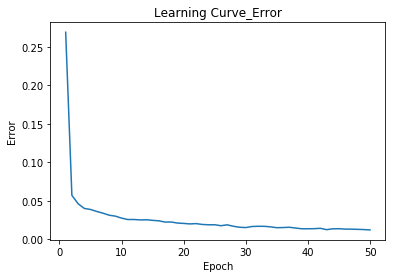

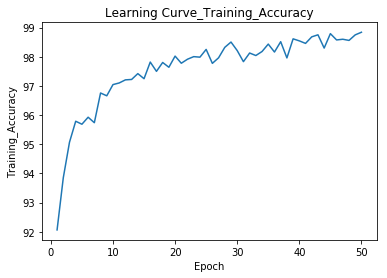

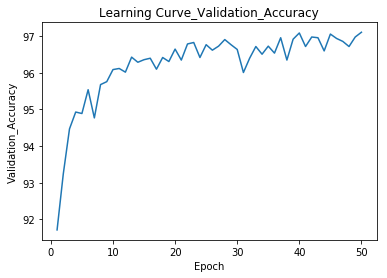

In [66]:
UT.plot_curve(range(1,my_mnist_net.iterations+1),evaluations[0], "Error")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[1], "Training_Accuracy")
UT.plot_curve(range(1,my_mnist_net.iterations+1), evaluations[2], "Validation_Accuracy")

<div class="panel panel-primary">
  <div class="panel-heading">Observations</div>
  <div class="panel-body">
Changing learning rate helped us achieving a better result: training accuracy is almost 99% and validation accuracy is 96.5%. Looking at the pattern of the curve, we think that with more iterations we can do a little bit better, but not much.
</div>
</div>